In [1]:
#import relevant libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#set data_location containing profiles.csv file
data_location = "data/profiles.csv"

In [3]:
#import profiles.csv file as a dataframe
all_data = pd.read_csv(data_location)
print(len(all_data))

59946


In [4]:
# set max_columns and max_colwidth to make it easier to see data in DataFrame
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 100
all_data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neithe...,"currently working as an international agent for a freight\nforwarding company. import, export, d...",making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexit...,"the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notic...","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), ...",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook rega...,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),NaN,i am die hard christopher moore fan. i don't really watch a lot of\ntv unless there is humor inv...,delicious porkness in all of its glories.<br />\nmy big ass doughboy's sinking into 15 new inche...,NaN,NaN,i am very open and will share just about anything.,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (poorly)",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public text on an online\ndating site makes me pleasantly u...","i make nerdy software for musicians, artists, and experimenters to\nindulge in their own weirdne...",improvising in different contexts. alternating between being\npresent and decidedly outside of a...,my large jaw and large glasses are the physical things people\ncomment on the most. when suffici...,"okay this is where the cultural matrix gets so specific, it's like\nbeing in the crosshairs.<br ...",movement<br />\nconversation<br />\ncreation<br />\ncontemplation<br />\ntouch<br />\nhumor,NaN,viewing. listening. dancing. talking. drinking. performing.,"when i was five years old, i was known as ""the boogerman"".","you are bright, open, intense, silly, ironic, critical, caring,\ngenerous, looking for an explor...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books according to the library\nof congress classification s...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, jarmusch, r.w. fassbender. . .<br />\ntwin peaks &a...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"hey how's it going? curre

In [5]:
all_data.columns.values

array(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5',
       'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height',
       'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status'], dtype=object)

In [6]:
#drop columns that will not be used for project
columns_to_drop = [
    'education',
    'ethnicity',
    'job',
    'last_online',
    'location',
    'offspring',
    'orientation',
    'pets',
    'religion',
    'sign',
    'speaks',
    'status',
    'income'
]
all_data.drop(columns_to_drop, axis=1, inplace=True)
all_data.columns.values

array(['age', 'body_type', 'diet', 'drinks', 'drugs', 'essay0', 'essay1',
       'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'height', 'sex', 'smokes'], dtype=object)

In [7]:
#check which columns have NaN values
all_data.isna().any()

age          False
body_type     True
diet          True
drinks        True
drugs         True
essay0        True
essay1        True
essay2        True
essay3        True
essay4        True
essay5        True
essay6        True
essay7        True
essay8        True
essay9        True
height        True
sex          False
smokes        True
dtype: bool

In [8]:
#remove NaNs in essay columns
essay_columns_with_nan_values = {
    'essay0': '',
    'essay1': '',
    'essay2': '',
    'essay3': '',
    'essay4': '',
    'essay5': '',
    'essay6': '',
    'essay7': '',
    'essay8': '',
    'essay9': ''
}
all_data.fillna(essay_columns_with_nan_values, inplace = True)

In [9]:
#remove NaNs in other columns
other_columns_with_nan_values = [
    'body_type', 
    'diet', 
    'drinks', 
    'drugs', 
    'height', 
    'smokes'
]
all_data.dropna(subset=other_columns_with_nan_values, inplace=True)

In [10]:
all_data.isna().any()

age          False
body_type    False
diet         False
drinks       False
drugs        False
essay0       False
essay1       False
essay2       False
essay3       False
essay4       False
essay5       False
essay6       False
essay7       False
essay8       False
essay9       False
height       False
sex          False
smokes       False
dtype: bool

In [11]:
# determine value counts for diet responses
all_data['diet'].value_counts()

mostly anything        12290
anything                4357
strictly anything       3341
mostly vegetarian       2322
mostly other             741
strictly vegetarian      632
vegetarian               366
strictly other           310
other                    233
mostly vegan             222
strictly vegan           160
vegan                     86
mostly kosher             64
mostly halal              36
strictly halal            15
strictly kosher           14
halal                      7
kosher                     6
Name: diet, dtype: int64

In [12]:
# map diet responses to a numeric code:
# 0 for vegan
# 1 for vegetarian
# 2 for religious
# 3 for any other response

def map_diet_to_code(diet):
    if "vegan" in diet:
        return 0
    elif "vegetarian" in diet:
        return 1
    elif "kosher" in diet or "halal" in diet:
        return 2
    else:
        return 3
    
all_data['diet_code'] = all_data['diet'].apply(map_diet_to_code)

#check that mapping diet responses has worked 

all_data['diet_code'].value_counts()

3    21272
1     3320
0      468
2      142
Name: diet_code, dtype: int64

In [13]:
#determine value counts for drinks
all_data['drinks'].value_counts()

socially       17929
rarely          2896
often           2162
not at all      1789
very often       264
desperately      162
Name: drinks, dtype: int64

In [14]:
# map drinks responses to a numeric code:
# 0 not at all
# 1 rarely
# 2 socially
# 3 often
# 4 very often
# 5 desperately

drinks_codes = {
    "not at all": 0,
    "rarely": 1,
    "socially": 2,
    "often": 3,
    "very often": 4,
    "desperately": 5
}

all_data["drinks_code"] = all_data['drinks'].map(drinks_codes)

#check that mapping drinks responses has worked 

all_data['drinks_code'].value_counts()

2    17929
1     2896
3     2162
0     1789
4      264
5      162
Name: drinks_code, dtype: int64

In [15]:
#determine value counts for drugs
all_data['drugs'].value_counts()

never        20339
sometimes     4600
often          263
Name: drugs, dtype: int64

In [16]:
# map drugs responses to a numeric code:
# 0 never
# 1 sometimes
# 2 often

drugs_codes = {
    "never": 0,
    "sometimes": 1,
    "often": 2
}

all_data["drugs_code"] = all_data['drugs'].map(drugs_codes)

#check that mapping drugs responses has worked 

all_data['drugs_code'].value_counts()

0    20339
1     4600
2      263
Name: drugs_code, dtype: int64

In [17]:
#determine value counts for smokes
all_data['smokes'].value_counts()

no                20402
sometimes          1688
when drinking      1429
yes                1032
trying to quit      651
Name: smokes, dtype: int64

In [18]:
# map smokes responses to a numeric code:
# 0 no
# 1 when drinking
# 2 sometimes
# 3 yes & trying to quit

smokes_codes = {
    "no": 0,
    "when drinking": 1,
    "sometimes": 2,
    "yes": 3,
    "trying to quit": 3
}

all_data["smokes_code"] = all_data['smokes'].map(smokes_codes)

#check that mapping smokes responses has worked 

all_data['smokes_code'].value_counts()

0    20402
2     1688
3     1683
1     1429
Name: smokes_code, dtype: int64

In [19]:
#determine value counts for sex
all_data['sex'].value_counts()

m    15140
f    10062
Name: sex, dtype: int64

In [20]:
# map sex responses to a numeric code:
# 0 for male (m)
# 1 for female (f)

sex_codes = {"m": 0, "f": 1}
all_data["sex_code"] = all_data['sex'].map(sex_codes)

# check that mapping sex responses has worked 

all_data['sex_code'].value_counts()

0    15140
1    10062
Name: sex_code, dtype: int64

In [21]:
#determine value counts for body type
all_data['body_type'].value_counts()

average           6802
fit               5742
athletic          5366
thin              2191
curvy             1843
a little extra    1312
skinny             804
full figured       464
overweight         227
jacked             191
used up            182
rather not say      78
Name: body_type, dtype: int64

In [22]:
# remove rows where response is "rather not say"

all_data = all_data.loc[all_data['body_type'] != "rather not say",:]

In [23]:
# map body_type responses to a numeric codes

body_type_codes = {
    "average": 0,
    "fit": 1,
    "athletic": 2,
    "thin": 3,
    "curvy": 4,
    "a little extra": 5,
    "skinny": 6,
    "full figured": 7,
    "overweight": 8,
    "jacked": 9,
    "used up": 10
}

all_data["body_type_code"] = all_data['body_type'].map(body_type_codes)

#check that mapping smokes responses has worked 

all_data['body_type_code'].value_counts()

0     6802
1     5742
2     5366
3     2191
4     1843
5     1312
6      804
7      464
8      227
9      191
10     182
Name: body_type_code, dtype: int64

In [24]:
all_data.columns.values

array(['age', 'body_type', 'diet', 'drinks', 'drugs', 'essay0', 'essay1',
       'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'height', 'sex', 'smokes', 'diet_code',
       'drinks_code', 'drugs_code', 'smokes_code', 'sex_code',
       'body_type_code'], dtype=object)

In [25]:
#drop essay columns as they will not be used for project

essay_columns_to_drop = [
    'essay0',
    'essay1',
    'essay2',
    'essay3',
    'essay4',
    'essay5',
    'essay6',
    'essay7',
    'essay8',
    'essay9'
]

all_data.drop(essay_columns_to_drop, axis=1, inplace=True)

In [26]:
all_data.columns.values

array(['age', 'body_type', 'diet', 'drinks', 'drugs', 'height', 'sex',
       'smokes', 'diet_code', 'drinks_code', 'drugs_code', 'smokes_code',
       'sex_code', 'body_type_code'], dtype=object)

In [27]:
print(len(all_data))

25124


In [28]:
all_data.isna().any()

age               False
body_type         False
diet              False
drinks            False
drugs             False
height            False
sex               False
smokes            False
diet_code         False
drinks_code       False
drugs_code        False
smokes_code       False
sex_code          False
body_type_code    False
dtype: bool

In [29]:
# build LinearRegression model to predict age

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

list_of_features_for_analysis = [
    'diet_code',
    'drinks_code',
    'drugs_code',
    'smokes_code',
    #'body_type_code',
]
features = all_data[list_of_features_for_analysis]
scaled_features = scale(features, axis=0)
age = all_data['age']

X_train, X_test, y_train, y_test = train_test_split(scaled_features, age, test_size=0.2, random_state=25)

model = LinearRegression()

model.fit(X_train, y_train)

mlr_training_score = model.score(X_train, y_train)

print("MLR training set score: %s" %(mlr_training_score))

mlr_test_score = model.score(X_test, y_test)

print("MLR test set score: %s" %(mlr_test_score))

MLR training set score: 0.0454287234876
MLR test set score: 0.04273801236


In [30]:
#build KNN Regressor to predict age

from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors = 50, weights = "distance")
regressor.fit(X_train, y_train)

knr_training_score = regressor.score(X_train, y_train)

print("KNR training set score: %s" %(knr_training_score))

knr_test_score = regressor.score(X_test, y_test)

print("KNR test set score: %s" %(knr_test_score))

KNR training set score: 0.0570123409856
KNR test set score: 0.0487649787324


In [31]:
# build KNN model to predict body type

list_of_features_classification = [
    'diet_code',
    'drinks_code',
    'drugs_code',
    'smokes_code',
    'age'
]
features_classification = all_data[list_of_features_classification]
scaled_features_classification = scale(features_classification, axis=0)
labels = all_data['body_type_code']

train_data, test_data, train_labels, test_labels = train_test_split(scaled_features_classification, labels, test_size=0.2, random_state=40)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_data, train_labels)

knn_training_score = classifier.score(train_data, train_labels)

print("KNN training set score: %s" %(knn_training_score))

knn_test_score = classifier.score(test_data, test_labels)

print("KNN test set score: %s" %(knn_test_score))

from sklearn.metrics import classification_report, confusion_matrix 
knn_predictions = classifier.predict(test_data)
print(confusion_matrix(test_labels, knn_predictions))
print(classification_report(test_labels, knn_predictions))

KNN training set score: 0.287924772377
KNN test set score: 0.2392039801
[[681 291 241  33  54  24  16   1   0   1   1]
 [534 271 222  41  56   7   5   0   0   1   2]
 [507 271 200  31  45   5   8   0   3   2   1]
 [216 110  88  26  17   1   7   0   0   1   1]
 [179  96  64  11  15   2   3   1   0   1   0]
 [133  48  48  16   9   3   4   0   0   0   0]
 [102  20  29   6   6   3   5   0   1   0   1]
 [ 38  22  11   2   6   0   1   0   0   0   0]
 [ 21  13   4   2   0   0   0   0   0   2   0]
 [ 18   8   8   4   0   1   0   0   0   0   0]
 [ 20   7   4   0   1   1   0   0   1   1   1]]
             precision    recall  f1-score   support

          0       0.28      0.51      0.36      1343
          1       0.23      0.24      0.24      1139
          2       0.22      0.19      0.20      1073
          3       0.15      0.06      0.08       467
          4       0.07      0.04      0.05       372
          5       0.06      0.01      0.02       261
          6       0.10      0.03      

In [34]:
#build SVM model to predict body type

from sklearn.svm import SVC
svc_classifier = SVC(kernel='rbf', gamma=10)
svc_classifier.fit(train_data, train_labels)

svc_training_score = svc_classifier.score(train_data, train_labels)

print("SVC training set score: %s" %(svc_training_score))

svc_test_score = classifier.score(test_data, test_labels)

print("SVC test set score: %s" %(svc_test_score))

svc_predictions = svc_classifier.predict(test_data)
print(confusion_matrix(test_labels, svc_predictions))
print(classification_report(test_labels, svc_predictions))

SVC training set score: 0.321359271606
SVC test set score: 0.267064676617
[[753 320 260   4   1   1   1   1   0   0   2]
 [554 305 273   3   1   2   0   0   0   0   1]
 [526 277 265   3   0   0   0   0   0   0   2]
 [245 127  89   3   0   0   1   0   0   0   2]
 [212  84  74   1   0   0   1   0   0   0   0]
 [156  54  46   3   0   2   0   0   0   0   0]
 [114  22  32   2   2   0   1   0   0   0   0]
 [ 44  20  16   0   0   0   0   0   0   0   0]
 [ 23  13   5   0   0   0   0   0   1   0   0]
 [ 24   7   7   0   0   0   0   0   0   0   1]
 [ 26   6   3   0   0   0   0   0   0   0   1]]
             precision    recall  f1-score   support

          0       0.28      0.56      0.37      1343
          1       0.25      0.27      0.26      1139
          2       0.25      0.25      0.25      1073
          3       0.16      0.01      0.01       467
          4       0.00      0.00      0.00       372
          5       0.40      0.01      0.02       261
          6       0.25      0.01    

/Users/Andrew/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


average           6802
fit               5742
athletic          5366
thin              2191
curvy             1843
a little extra    1312
skinny             804
full figured       464
overweight         227
jacked             191
used up            182
dtype: int64


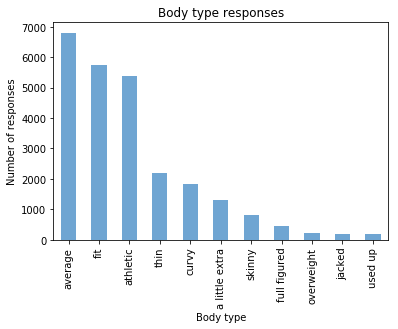

In [47]:
# branding colours

light_blue = "#6fa5d2"
medium_blue = "#456785"
dark_blue = "#293748"

#generate bar chart for body types

body_type_responses = pd.value_counts(all_data['body_type'].values, sort=True)
print(body_type_responses)
ax = body_type_responses.plot(kind='bar', title='Body type responses', color=light_blue)
ax.set(xlabel='Body type', ylabel='Number of responses')
plt.show()

In [ ]:
#generate histogram chart for body types

plt.hist(all_date.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.color()
plt.show()
